In [ ]:
# def unpickle(file):
#     import pickle
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

# file = "/content/drive/MyDrive/Google work/cifar-10-batches-py/data_batch_1"
# unpickle(file)

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Import all the library
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train,y_train

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [5]:
x_test, y_test

(array([[[[158, 112,  49],
          [159, 111,  47],
          [165, 116,  51],
          ...,
          [137,  95,  36],
          [126,  91,  36],
          [116,  85,  33]],
 
         [[152, 112,  51],
          [151, 110,  40],
          [159, 114,  45],
          ...,
          [136,  95,  31],
          [125,  91,  32],
          [119,  88,  34]],
 
         [[151, 110,  47],
          [151, 109,  33],
          [158, 111,  36],
          ...,
          [139,  98,  34],
          [130,  95,  34],
          [120,  89,  33]],
 
         ...,
 
         [[ 68, 124, 177],
          [ 42, 100, 148],
          [ 31,  88, 137],
          ...,
          [ 38,  97, 146],
          [ 13,  64, 108],
          [ 40,  85, 127]],
 
         [[ 61, 116, 168],
          [ 49, 102, 148],
          [ 35,  85, 132],
          ...,
          [ 26,  82, 130],
          [ 29,  82, 126],
          [ 20,  64, 107]],
 
         [[ 54, 107, 160],
          [ 56, 105, 149],
          [ 45,  89, 132],
   

In [6]:
# Filtering 'airplane' and 'automobile' images
# Class 0 = airplane
# Class 1 = automobile
classes = [0, 1]
train = np.isin(y_train, classes).flatten()
test = np.isin(y_test, classes).flatten()
x_train, y_train = x_train[train], y_train[train]
x_test, y_test = x_test[test], y_test[test]

In [7]:
# Normalize pixel values to the range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
# Split dataset into training and testing part
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42)

In [12]:
# The architecture for the Speaker model
speaker = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),  # Message size
])
y_train_split = to_categorical(y_train_split, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [13]:
# The architecture for the Listener model
# output size given 2
listener = models.Sequential([
    layers.Input(shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [14]:
# Compile the Listener model
listener.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [15]:
# Generate messages from the Speaker for the training set
speaker_messages_train = speaker.predict(x_train_split)

250/250 [==============================] - 1s 5ms/step


In [21]:
# Train the Listener on x_train_split, y_train_split
listener.fit(speaker_messages_train, y_train_split, epochs=10, batch_size=64)

Epoch 1/10
125/125 [==============================] - 0s 2ms/step - loss: 0.5016 - accuracy: 0.7601
Epoch 2/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4991 - accuracy: 0.7588
Epoch 3/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.7636
Epoch 4/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7638
Epoch 5/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4919 - accuracy: 0.7621
Epoch 6/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4867 - accuracy: 0.7696
Epoch 7/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4858 - accuracy: 0.7657
Epoch 8/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4827 - accuracy: 0.7682
Epoch 9/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7744
Epoch 10/10
125/125 [==============================] - 0s 2ms/step - loss: 0.4790 - accuracy: 0.7714

In [22]:
# Generate messages from the Speaker for the testing set
speaker_messages_test = speaker.predict(x_test)

63/63 [==============================] - 0s 2ms/step


In [23]:
# Evaluate the Listener on the testing set
listener_accuracy = listener.evaluate(speaker_messages_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.4870 - accuracy: 0.7720


In [1]:
print(f"Listener Accuracy: {listener_accuracy[1]*100:.3f}%")

NameError: ignored

**Visualizing 10 taken images**

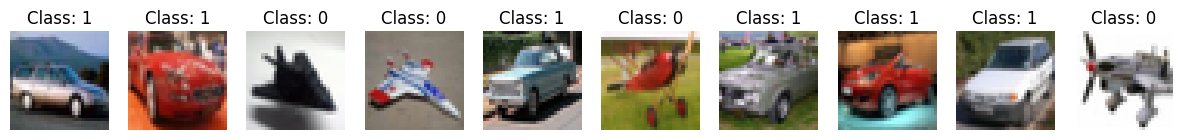

In [ ]:

import matplotlib.pyplot as plt

# Sample and display a few filtered images
num_images_to_display = 10  # Adjust as needed

fig, axes = plt.subplots(1, num_images_to_display, figsize=(15, 3))

for i in range(num_images_to_display):
    ax = axes[i]
    ax.imshow(x_train[i])
    ax.set_title(f"Class: {y_train[i][0]}")
    ax.axis('off')

plt.show()